In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
[1,2,3]*5

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [4]:
np.asarray([1,2,3])*5

array([ 5, 10, 15])

Text(0, 0.5, 'amplitud')

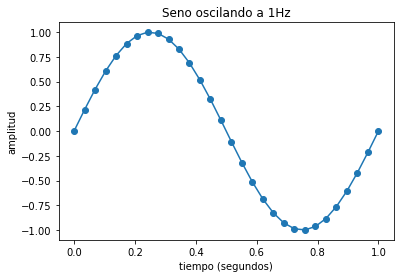

In [17]:
F = 1
Fm = 30
t = np.linspace(0,1,Fm)
y = np.sin(2*np.pi*F*t)

plt.title(f"Seno oscilando a {F}Hz")
plt.plot(t,y,'o-')
plt.xlabel("tiempo (segundos)")
plt.ylabel("amplitud")

# Caso práctico

In [19]:
# Sensor de humedad: Serie temporal de datos Fm=5Hz
# Sensor de temperatura: Serie temporal de datos Fm=10Hz

In [127]:
# Sensor temperatura
t_Temp = np.linspace(0,5,50)
#y_Temp = np.random.random(len(t_Temp))
y_Temp = np.sin(2*np.pi*0.5*t_Temp) + 10

# Sensor humedad
t_Hum = np.linspace(0,5,10)
y_Hum = np.random.random(len(t_Hum)) * 5 + 6

Text(0.5, 0, 'tiempo (horas)')

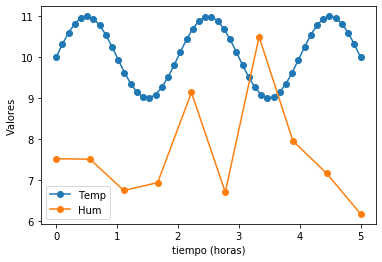

In [128]:
plt.plot(t_Temp,y_Temp,'o-')
plt.plot(t_Hum,y_Hum,'o-')
plt.legend(["Temp","Hum"])
plt.ylabel("Valores")
plt.xlabel("tiempo (horas)")

In [129]:
y_Temp

array([10.        , 10.31510822, 10.59811053, 10.82017225, 10.95866785,
       10.99948622, 10.93846842, 10.78183148, 10.5455349 , 10.25365458,
        9.93592978,  9.624733  ,  9.3517716 ,  9.14485724,  9.02507209,
        9.00462089,  9.08558738,  9.259722  ,  9.50928245,  9.80884137,
       10.12787716, 10.43388374, 10.69568255, 10.88659931, 10.98718178,
       10.98718178, 10.88659931, 10.69568255, 10.43388374, 10.12787716,
        9.80884137,  9.50928245,  9.259722  ,  9.08558738,  9.00462089,
        9.02507209,  9.14485724,  9.3517716 ,  9.624733  ,  9.93592978,
       10.25365458, 10.5455349 , 10.78183148, 10.93846842, 10.99948622,
       10.95866785, 10.82017225, 10.59811053, 10.31510822, 10.        ])

In [130]:
y_Hum

array([ 7.51939661,  7.50775609,  6.74460693,  6.93524811,  9.13864365,
        6.70200719, 10.49740181,  7.95624981,  7.16004273,  6.17137414])

## Data interpolation

In [131]:
from scipy.interpolate import interp1d

In [132]:
fn = interp1d(t_Hum, y_Hum, kind="cubic")

In [133]:
y_Hum_interp = fn(t_Temp)
y_Hum_interp

array([ 7.51939661,  7.61150146,  7.65525599,  7.65583463,  7.61841181,
        7.54816197,  7.45025952,  7.32987891,  7.19219456,  7.04238089,
        6.88561234,  6.72707074,  6.57930514,  6.47605649,  6.4548529 ,
        6.5532225 ,  6.8086934 ,  7.25121622,  7.82265309,  8.40803488,
        8.89144526,  9.15696789,  9.08922549,  8.66036545,  8.02607427,
        7.36514927,  6.85638778,  6.67858713,  6.98122696,  7.68095495,
        8.58338769,  9.49345795, 10.21609852, 10.55827465, 10.44889949,
       10.0059054 ,  9.36348448,  8.65582884,  8.01713055,  7.56104596,
        7.2863193 ,  7.15174634,  7.11608274,  7.13808414,  7.1765062 ,
        7.19010456,  7.13763489,  6.97785282,  6.66951403,  6.17137414])

Text(0.5, 0, 'tiempo (horas)')

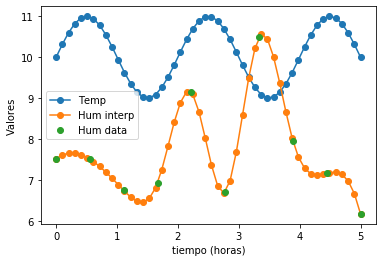

In [134]:
plt.plot(t_Temp,y_Temp,'o-')
plt.plot(t_Temp,y_Hum_interp,'o-')
plt.plot(t_Hum,y_Hum,'o')

plt.legend(["Temp","Hum interp", "Hum data"])
plt.ylabel("Valores")
plt.xlabel("tiempo (horas)")

## Check the alarm

In [135]:
alert = (y_Temp-y_Hum_interp) < 0

Text(0.5, 0, 'tiempo (horas)')

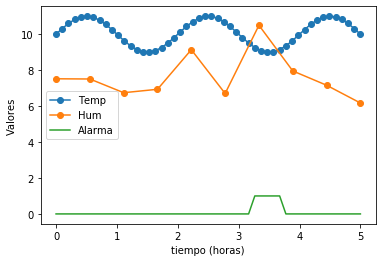

In [136]:
plt.plot(t_Temp,y_Temp,'o-')
plt.plot(t_Hum,y_Hum,'o-')
plt.plot(t_Temp,alert)
plt.legend(["Temp","Hum", "Alarma"])
plt.ylabel("Valores")
plt.xlabel("tiempo (horas)")

In [137]:
import pandas as pd

df = pd.DataFrame({
    "t":t_Temp,
    "y_Temp":y_Temp,
    "y_Hum": y_Hum_interp,
    "alarm":alert
})

In [138]:
df.to_json("data/export/alarm.json", orient="records")